In [1]:
### TEMP 



# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_colwidth', None)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from matplotlib import pyplot as plt
import seaborn as sns

# from plotly.offline import init_notebook_mode
# init_notebook_mode(connected=True)
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

import textwrap

from google.cloud import bigquery
import datetime

import warnings
warnings.filterwarnings('ignore')



# function for safe queries (based on Kaggle SQL course)
def querytodf(query):
    dry_run_config = bigquery.QueryJobConfig(dry_run=True)

    # API request - dry run query to estimate costs
    dry_run_query_job = client.query(query, job_config=dry_run_config)
    print("This query will process {} bytes.".format(dry_run_query_job.total_bytes_processed))

    # Only run the query if it's less than 1 GB
    ONE_GB = 1000*1000*1000
    safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_GB)

    # Set up the query (will only run if it's less than 1 GB)
    safe_query_job = client.query(query, job_config=safe_config)

    return safe_query_job.to_dataframe()

# get 'bls' dataset
client = bigquery.Client()
dataset_ref = client.dataset("bls", project="bigquery-public-data")
dataset = client.get_dataset(dataset_ref)



# check column info for CES series table
table_ref = dataset_ref.table('employment_hours_earnings_series')
table = client.get_table(table_ref)



# supersector codes
url = 'https://download.bls.gov/pub/time.series/ce/ce.supersector'
dfss = pd.read_csv(url, sep='\t')
# display(table.schema[1], '', dfss)

# industry codes
url = 'https://download.bls.gov/pub/time.series/ce/ce.industry'
dfi = pd.read_csv(url, sep='\t')
# display(table.schema[2], '', dfi)

def indlvl(num):
    return dfi[dfi.display_level == num].industry_name

# datatype codes
url = 'https://download.bls.gov/pub/time.series/ce/ce.datatype'
dft = pd.read_csv(url, sep='\t')
# display(table.schema[3], '', dft)

# split long text (https://community.plotly.com/t/wrap-long-text-in-title-in-dash/11419)
def split(text, width):
    split_text = textwrap.wrap(text, width=width)
    return '<br>'.join(split_text)

Using Kaggle's public dataset BigQuery integration.


In [2]:
# display(plt.style.available)

pio.renderers.default = 'notebook_connected'
display(pio.renderers)

pio.templates.default = 'gridon'
display(pio.templates)



display(plt.style.available)

plt.style.use('default')

# plt.style.use('bmh')
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn-whitegrid')
# plt.style.use('seaborn-white')

plt.style.use('seaborn-notebook')

# sns.set_palette('tab20')
# sns.set_palette('Set2')

Renderers configuration
-----------------------
    Default renderer: 'notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

Templates configuration
-----------------------
    Default template: 'gridon'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

# How did COVID-19 Impact the U.S. Labor Market?
# How is the U.S. Labor Market Recovering from COVID-19?

This notebook is inspired by some of the findings here:

https://www.kaggle.com/heisxiang/are-price-levels-increasing-faster-than-wages

namely that average wages rose dramatically during the onset of Covid-19

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_colwidth', None)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from matplotlib import pyplot as plt
import seaborn as sns

from google.cloud import bigquery
import datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# function for safe queries (based on Kaggle SQL course)
def querytodf(query):
    dry_run_config = bigquery.QueryJobConfig(dry_run=True)

    # API request - dry run query to estimate costs
    dry_run_query_job = client.query(query, job_config=dry_run_config)
    print("This query will process {} bytes.".format(dry_run_query_job.total_bytes_processed))

    # Only run the query if it's less than 1 GB
    ONE_GB = 1000*1000*1000
    safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_GB)

    # Set up the query (will only run if it's less than 1 GB)
    safe_query_job = client.query(query, job_config=safe_config)

    return safe_query_job.to_dataframe()

# get 'bls' dataset
client = bigquery.Client()
dataset_ref = client.dataset("bls", project="bigquery-public-data")
dataset = client.get_dataset(dataset_ref)

# Examine Dataset to Build Queries
Explore the data to find what we want to query

Available tables:

In [ ]:
# list of tables
tables = client.list_tables(dataset_ref)
for table in tables: print(table.table_id)

Column info and first 5 rows of `employment_hours_earnings` table:

In [ ]:
# check column info for CES table
table_ref = dataset_ref.table('employment_hours_earnings')
table = client.get_table(table_ref)
display(table.schema)

# show first 5 rows
client.list_rows(table, max_results=5).to_dataframe()

Each set of time series data has a corresponding `series_id` and `series_title`. We need to find the relevant `series_id`'s that will help answer our question. To do this we'll examine the `employment_hours_earnings_series` table which has additional info about each `series_id`.

Column info and first 5 rows of `employment_hours_earnings_series` table:

In [ ]:
# check column info for CES series table
table_ref = dataset_ref.table('employment_hours_earnings_series')
table = client.get_table(table_ref)
display(table.schema)

# show first 5 rows
client.list_rows(table, max_results=5).to_dataframe()

We can see that each `series_id` corresponds with a number of codes describing its data. We'll explore the possible values of each code and cherry pick the ones relevant to our analysis. Files from https://download.bls.gov/pub/time.series/ce/

`supersector_code`:

In [ ]:
url = 'https://download.bls.gov/pub/time.series/ce/ce.supersector'
dfss = pd.read_csv(url, sep='\t')
display(table.schema[1], '', dfss)

`industry_code`:

In [ ]:
url = 'https://download.bls.gov/pub/time.series/ce/ce.industry'
dfi = pd.read_csv(url, sep='\t')
display(table.schema[2], '', dfi)

In [ ]:
def indlvl(num):
    return dfi[dfi.display_level == num].industry_name

# for lvl in dfi.display_level.unique():
#     display('Industry level ' + str(lvl), indlvl(lvl), '')

`data_type_code`:

In [ ]:
url = 'https://download.bls.gov/pub/time.series/ce/ce.datatype'
dft = pd.read_csv(url, sep='\t')
display(table.schema[3], '', dft)

`seasonal`:

In [ ]:
url = 'https://download.bls.gov/pub/time.series/ce/ce.seasonal'
df = pd.read_csv(url, sep='\t')
display(table.schema[4], '', df)

`footnote_codes`:

In [ ]:
url = 'https://download.bls.gov/pub/time.series/ce/ce.footnote'
df = pd.read_csv(url, sep='\t')
display(table.schema[6], '', df)

There is a lot of available data, the bls.gov website provides explanations here: https://www.bls.gov/web/empsit/cestn.htm

It looks like each industry has a corresponding level. We'll keep this in mind for later in our analysis. For now we'll take all sectors, all industries, seasonally adjusted data to eliminate noise, and the following data types:

Relevant data types for this analysis:
* 1	ALL EMPLOYEES, THOUSANDS
* 2	AVERAGE WEEKLY HOURS OF ALL EMPLOYEES
* 3	AVERAGE HOURLY EARNINGS OF ALL EMPLOYEES
* 6	PRODUCTION AND NONSUPERVISORY EMPLOYEES, THOUSANDS
* 7	AVERAGE WEEKLY HOURS OF PRODUCTION AND NONSUPERVISORY EMPLOYEES
* 8	AVERAGE HOURLY EARNINGS OF PRODUCTION AND NONSUPERVISORY EMPLOYEES
* 11	AVERAGE WEEKLY EARNINGS OF ALL EMPLOYEES
* 30	AVERAGE WEEKLY EARNINGS OF PRODUCTION AND NONSUPERVISORY EMPLOYEES
* 56	AGGREGATE WEEKLY HOURS OF ALL EMPLOYEES, THOUSANDS
* 57	AGGREGATE WEEKLY PAYROLLS OF ALL EMPLOYEES, THOUSANDS
* 81	AGGREGATE WEEKLY HOURS OF PRODUCTION AND NONSUPERVISORY EMPLOYEES, THOUSANDS
* 82	AGGREGATE WEEKLY PAYROLLS OF PRODUCTION AND NONSUPERVISORY EMPLOYEES, THOUSANDS

from `ce.text` located at https://download.bls.gov/pub/time.series/ce/:
<PRE> </PRE>
asdfasdfasdf

# Query + Prepare Data

Build query based on conditions determined above:

In [3]:
%%time
# build query
query = """ 
SELECT 
    ces.series_id, 
    ces_s.data_type_code AS data_type, 
    ces_s.supersector_code AS supersector, 
    ces_s.industry_code AS industry, 
    ces.year, 
    ces.period, 
    ces.date, 
    ces.value
FROM `bigquery-public-data.bls.employment_hours_earnings` ces
INNER JOIN `bigquery-public-data.bls.employment_hours_earnings_series` ces_s
    ON ces.series_id = ces_s.series_id
WHERE ces_s.data_type_code IN (1,2,3,6,7,8,11,30,56,57,81,82)
AND ces_s.seasonal = 'S'
AND EXTRACT(YEAR FROM ces.date) >= 2019
ORDER BY ces.series_id, ces.date
"""

# query data
dfall = querytodf(query)

This query will process 353568234 bytes.
CPU times: user 7.21 s, sys: 466 ms, total: 7.67 s
Wall time: 19.9 s


In [4]:
%%time
### data cleaning + feature engineering

# replace codes with names
# dfall.rename(columns = {'data_type_code': 'data_type', 
#                        'supersector_code': 'supersector', 
#                        'industry_code': 'industry'}, 
#             inplace=True)
dfall['data_type'] = dfall['data_type'].replace(list(dft.data_type_code), 
                                                        list(dft.data_type_text))
dfall['supersector'] = dfall['supersector'].replace(list(dfss.supersector_code), 
                                                            list(dfss.supersector_name))
dfall['industry'] = dfall['industry'].replace(list(dfi.industry_code), 
                                                      list(dfi.industry_name))
dfall['ind_lvl'] = dfall['industry'].replace(list(dfi.industry_name), 
                                                      list(dfi.display_level))

CPU times: user 16.4 s, sys: 199 ms, total: 16.6 s
Wall time: 16.6 s


In [5]:
%%time
# split 'data_type column' for easier slicing
dict1 = {
    'ALL EMPLOYEES, THOUSANDS': 'EMPLOYMENT OF ALL, THOUSANDS', 
    'PRODUCTION AND NONSUPERVISORY EMPLOYEES, THOUSANDS': 'EMPLOYMENT OF PRODUCTION AND NONSUPERVISORY, THOUSANDS'
}
dfall['data_type'] = dfall.data_type.replace(dict1)
newcols = dfall.data_type.str.split(', ', expand=True)
# display(newcols)
newcols[[0,2]] = newcols[0].str.split(' OF ', expand=True)
# display(newcols)
newcols[0] = (newcols[0] + ', ' + newcols[1].fillna('')).str.rstrip(', ')
newcols[2] = newcols[2].str.replace(' EMPLOYEES', '')
newcols.drop(1, axis=1, inplace=True)
dfall[['data_type', 'employee_type']] = newcols

CPU times: user 1.82 s, sys: 40.7 ms, total: 1.86 s
Wall time: 1.87 s


In [6]:
%%time
# rename industries belonging to multiple supersectors
df=dfall.groupby(
    ['data_type', 'industry', 'employee_type']
).series_id.nunique().sort_values(ascending=False).reset_index()
i = df[df.series_id == 2].industry.unique()
# display(dfall[dfall.industry.isin(i)].groupby('industry').supersector.unique())
def rename(row):
    if row.industry in i:
        row.industry = f'{row.industry} ({row.supersector})'
    return row
dfall = dfall.apply(rename, axis=1)

CPU times: user 22.1 s, sys: 362 ms, total: 22.5 s
Wall time: 22.5 s


In [7]:
%%time
# reorder columns
emp = dfall['employee_type']
dfall.drop('employee_type', axis=1, inplace=True)
dfall.insert(loc=2, column='employee_type', value=emp)

lvl = dfall['ind_lvl']
dfall.drop('ind_lvl', axis=1, inplace=True)
dfall.insert(loc=5, column='ind_lvl', value=lvl)

display(dfall)

,series_id,data_type,employee_type,supersector,industry,ind_lvl,year,period,date,value
0,CES0000000001,"EMPLOYMENT, THOUSANDS",ALL,Total nonfarm,Total nonfarm,0,2019,M01,2019-01-01,150145.0
1,CES0000000001,"EMPLOYMENT, THOUSANDS",ALL,Total nonfarm,Total nonfarm,0,2019,M02,2019-02-01,150095.0
2,CES0000000001,"EMPLOYMENT, THOUSANDS",ALL,Total nonfarm,Total nonfarm,0,2019,M03,2019-03-01,150263.0
3,CES0000000001,"EMPLOYMENT, THOUSANDS",ALL,Total nonfarm,Total nonfarm,0,2019,M04,2019-04-01,150482.0
4,CES0000000001,"EMPLOYMENT, THOUSANDS",ALL,Total nonfarm,Total nonfarm,0,2019,M05,2019-05-01,150545.0
...,...,...,...,...,...,...,...,...,...,...
202596,CES9093299901,"EMPLOYMENT, THOUSANDS",ALL,Government,Other local government,5,2021,M01,2021-01-01,943.3
202597,CES9093299901,"EMPLOYMENT, THOUSANDS",ALL,Government,Other local government,5,2021,M02,2021-02-01,946.2
202598,CES9093299901,"EMPLOYMENT, THOUSANDS",ALL,Government,Other local government,5,2021,M03,2021-03-01,957.0
202599,CES9093299901,"EMPLOYMENT, THOUSANDS",ALL,Government,Other local government,5,2021,M04,2021-04-01,961.0


CPU times: user 125 ms, sys: 1.09 ms, total: 126 ms
Wall time: 128 ms


In [8]:
%%time
# variables for slicing data

types = pd.Series(dfall.data_type.unique())
display('types:', types, '')

basic = types[[0,4,5]].reset_index(drop=True)
derived = types[[1,2,3]].reset_index(drop=True)

employees = dfall.employee_type.unique()
display('employees:', employees, '')

sectors = pd.Series(dfall.supersector.unique())
display('sectors:', sectors, '')

industries = dfall.industry.unique()
# display(industries)

# function for getting industry names by level
def indlvl(lvl):
    return dfi[dfi.display_level == lvl].industry_name

c19p = datetime.date(2020,1,1)
c19a = datetime.date(2020,2,1)
c19b = datetime.date(2020,4,1)

cdate19 = dfall.year == 2019
cdatep = dfall.date == c19p
cdatea = dfall.date == c19a
cdateb = dfall.date == c19b

'types:'

0                   EMPLOYMENT, THOUSANDS
1                    AVERAGE WEEKLY HOURS
2                 AVERAGE HOURLY EARNINGS
3                 AVERAGE WEEKLY EARNINGS
4       AGGREGATE WEEKLY HOURS, THOUSANDS
5    AGGREGATE WEEKLY PAYROLLS, THOUSANDS
dtype: object

''

'employees:'

array(['ALL', 'PRODUCTION AND NONSUPERVISORY'], dtype=object)

''

'sectors:'

0                            Total nonfarm
1                            Total private
2                          Goods-producing
3                        Service-providing
4                Private service-providing
5                       Mining and logging
6                             Construction
7                            Manufacturing
8                            Durable Goods
9                         Nondurable Goods
10    Trade, transportation, and utilities
11                         Wholesale trade
12                            Retail trade
13          Transportation and warehousing
14                               Utilities
15                             Information
16                    Financial activities
17      Professional and business services
18           Education and health services
19                 Leisure and hospitality
20                          Other services
21                              Government
dtype: object

''

CPU times: user 215 ms, sys: 2.22 ms, total: 217 ms
Wall time: 215 ms


# Feature Engineering

In [ ]:
# create 'sup employees'

def sup_basic(data):
    df = data.copy()
    data = data[data.data_type.isin(basic)]
    if data.empty:
        print('no valid data types')
        return
#     empcount = data[data.data_type == typ].groupby(['data_type', 'industry']).employee_type.nunique().reset_index()
#     i = empcount[empcount.employee_type == 2].industry
    for typ in data.data_type.unique():
        df0 = data[data.data_type == typ]
        empcount = df0.groupby('industry').employee_type.nunique()
        i = empcount[empcount == 2].index
        for ind in i:
            df1 = df0[(df0.industry == ind)]
            df1 = df1.pivot(index=['data_type', 'supersector', 'industry', 'ind_lvl', 'year', 'period', 'date'], columns='employee_type', values='value').reset_index()
            df1['SUPERVISORY'] = df1['ALL'] - df1['PRODUCTION AND NONSUPERVISORY']
            df1 = df1.melt(id_vars=['data_type', 'supersector', 'industry', 'ind_lvl', 'year', 'period', 'date'], value_vars=['SUPERVISORY'], var_name='employee_type')
            df = df.append(df1, ignore_index=True)
    return df

# df0 = dfall[
#     cdatep
# ]
# # create for all 3 basic data types
# df = sup_basic(df0)
# df

In [ ]:
df.duplicated().value_counts()
# df.values.tolist()

In [ ]:
# create derived data

def sup_derived(data):
    df=data.copy()
    data = data[(data.employee_type == 'SUPERVISORY')
                & data.data_type.isin(basic)]
    typcount = data.groupby('industry').data_type.nunique()
    i = typcount[typcount == 3].index
    
    for ind in i:
        df0 = data[data.industry == ind]
        df0 = df0.pivot(index=['supersector', 'industry', 'ind_lvl', 'year', 'period', 'date', 'employee_type'], columns='data_type', values='value').reset_index()
        df0[derived[0]] = df0[basic[1]] / df0[basic[0]]
        df0[derived[1]] = df0[basic[2]] / df0[basic[1]]
        df0[derived[2]] = df0[basic[2]] / df0[basic[0]]

        df0 = df0.melt(id_vars =['supersector', 'industry', 'ind_lvl', 'year', 'period', 'date', 'employee_type'], value_vars=derived, var_name='data_type')
        df = df.append(df0, ignore_index=True)
    return df

# dfder = sup_derived(df)
# dfder

In [ ]:
dfder.duplicated().value_counts()

In [ ]:
# put basic and derived together
def add_sup(data):
    return sup_derived(sup_basic(data))

In [ ]:
# test add_sup function
df = dfall[(dfall.year >= 2019)
          & (dfall.industry == 'Total private')]

suptest = add_sup(df)

suptest

In [ ]:
cols = ['series_id', 
        'data_type', 
        'supersector', 
        'industry', 
        'ind_lvl', 
        'employee_type']

In [9]:
# transform queried data into simplified form

# final DF columns = ['series_id', 'data_type', 'supersector', 'industry', 'ind_lvl', 'employee', 'Avg2019', 'Jan2020', 'Feb2020', 'Apr2020', 'change', '% change']

cols = ['series_id', 
        'data_type', 
        'supersector', 
        'industry', 
        'ind_lvl', 
        'employee_type']

df = dfall[cdate19].groupby(cols).value.mean().rename('Avg2019').reset_index()
df['Jan2020'] = dfall[cdatep].groupby(cols).value.mean().values
df['Feb2020'] = dfall[cdatea].groupby(cols).value.mean().values
df['Apr2020'] = dfall[cdateb].groupby(cols).value.mean().values
df['change'] = df['Apr2020'] - df['Feb2020']
df['% change'] = (df['Apr2020'] - df['Feb2020']) / df['Feb2020']

dff = df
display(dff)

,series_id,data_type,supersector,industry,ind_lvl,employee_type,Avg2019,Jan2020,Feb2020,Apr2020,change,% change
0,CES0000000001,"EMPLOYMENT, THOUSANDS",Total nonfarm,Total nonfarm,0,ALL,150900.083333,152234.00,152523.00,130161.00,-22362.00,-0.146614
1,CES0500000001,"EMPLOYMENT, THOUSANDS",Total private,Total private,1,ALL,128290.416667,129445.00,129688.00,108335.00,-21353.00,-0.164649
2,CES0500000002,AVERAGE WEEKLY HOURS,Total private,Total private,1,ALL,34.391667,34.30,34.40,34.20,-0.20,-0.005814
3,CES0500000003,AVERAGE HOURLY EARNINGS,Total private,Total private,1,ALL,27.995833,28.43,28.51,30.07,1.56,0.054718
4,CES0500000006,"EMPLOYMENT, THOUSANDS",Total private,Total private,1,PRODUCTION AND NONSUPERVISORY,105574.500000,106444.00,106651.00,87038.00,-19613.00,-0.183899
...,...,...,...,...,...,...,...,...,...,...,...,...
6960,CES9093222101,"EMPLOYMENT, THOUSANDS",Government,Local government utilities,5,ALL,246.875000,248.20,248.20,247.10,-1.10,-0.004432
6961,CES9093248001,"EMPLOYMENT, THOUSANDS",Government,Local government transportation,5,ALL,290.283333,295.50,294.90,293.90,-1.00,-0.003391
6962,CES9093262201,"EMPLOYMENT, THOUSANDS",Government,Local hospitals,5,ALL,682.191667,689.20,690.40,677.40,-13.00,-0.018830
6963,CES9093292001,"EMPLOYMENT, THOUSANDS",Government,Local government general administration,5,ALL,4255.641667,4286.70,4295.70,4107.50,-188.20,-0.043811


In [20]:
dff.sort_values(by='% change', ascending=False)

,series_id,data_type,supersector,industry,ind_lvl,employee_type,Avg2019,Jan2020,Feb2020,Apr2020,change,% change
2795,CES4244229030,AVERAGE WEEKLY EARNINGS,Retail trade,Other home furnishings stores,6,PRODUCTION AND NONSUPERVISORY,352.725000,357.14,370.50,644.10,273.60,0.738462
3224,CES4245120011,AVERAGE WEEKLY EARNINGS,Retail trade,Book stores and news dealers,5,ALL,399.560000,365.86,373.71,634.09,260.38,0.696743
6174,CES7071310011,AVERAGE WEEKLY EARNINGS,Leisure and hospitality,Amusement parks and arcades,5,ALL,379.834167,386.57,374.38,631.33,256.95,0.686335
2794,CES4244229011,AVERAGE WEEKLY EARNINGS,Retail trade,Other home furnishings stores,6,ALL,466.934167,476.04,477.90,803.71,325.81,0.681754
3225,CES4245120030,AVERAGE WEEKLY EARNINGS,Retail trade,Book stores and news dealers,5,PRODUCTION AND NONSUPERVISORY,263.890833,254.00,255.35,425.09,169.74,0.664735
...,...,...,...,...,...,...,...,...,...,...,...,...
6676,CES8081211357,"AGGREGATE WEEKLY PAYROLLS, THOUSANDS",Other services,Nail salons,7,ALL,41984.833333,46396.00,47697.00,4043.00,-43654.00,-0.915236
6675,CES8081211356,"AGGREGATE WEEKLY HOURS, THOUSANDS",Other services,Nail salons,7,ALL,3263.166667,3409.00,3429.00,290.00,-3139.00,-0.915427
6266,CES7071395082,"AGGREGATE WEEKLY PAYROLLS, THOUSANDS",Leisure and hospitality,Bowling centers,6,PRODUCTION AND NONSUPERVISORY,15986.333333,17208.00,17514.00,1364.00,-16150.00,-0.922119
1355,CES3133610081,"AGGREGATE WEEKLY HOURS, THOUSANDS",Durable Goods,Motor vehicles (Durable Goods),6,PRODUCTION AND NONSUPERVISORY,8610.083333,8468.00,9109.00,682.00,-8427.00,-0.925129


In [10]:
dfPC = dff.iloc[:, [0,1,2,3,4,5,7,8]]
dfPC['Jan-Feb %'] = (dfPC['Feb2020'] - dfPC['Jan2020']) / dfPC['Jan2020']
dfPC[(dfPC['Jan-Feb %'] > 0)
     & dfPC.data_type.isin(basic)]

,series_id,data_type,supersector,industry,ind_lvl,employee_type,Jan2020,Feb2020,Jan-Feb %
0,CES0000000001,"EMPLOYMENT, THOUSANDS",Total nonfarm,Total nonfarm,0,ALL,152234.0,152523.0,0.001898
1,CES0500000001,"EMPLOYMENT, THOUSANDS",Total private,Total private,1,ALL,129445.0,129688.0,0.001877
4,CES0500000006,"EMPLOYMENT, THOUSANDS",Total private,Total private,1,PRODUCTION AND NONSUPERVISORY,106444.0,106651.0,0.001945
9,CES0500000056,"AGGREGATE WEEKLY HOURS, THOUSANDS",Total private,Total private,1,ALL,4439964.0,4461267.0,0.004798
10,CES0500000057,"AGGREGATE WEEKLY PAYROLLS, THOUSANDS",Total private,Total private,1,ALL,126228177.0,127190722.0,0.007625
...,...,...,...,...,...,...,...,...,...
6958,CES9093161101,"EMPLOYMENT, THOUSANDS",Government,Local government education,4,ALL,8024.5,8029.6,0.000636
6959,CES9093200001,"EMPLOYMENT, THOUSANDS",Government,"Local government, excluding education",4,ALL,6628.8,6639.7,0.001644
6962,CES9093262201,"EMPLOYMENT, THOUSANDS",Government,Local hospitals,5,ALL,689.2,690.4,0.001741
6963,CES9093292001,"EMPLOYMENT, THOUSANDS",Government,Local government general administration,5,ALL,4286.7,4295.7,0.002100


In [11]:
dfPC[(dfPC['Jan-Feb %'] < 0)
     & dfPC.data_type.isin(basic)
     & (dfPC.ind_lvl == 5)].sort_values(by='Jan-Feb %').head(20)

,series_id,data_type,supersector,industry,ind_lvl,employee_type,Jan2020,Feb2020,Jan-Feb %
1174,CES3133360057,"AGGREGATE WEEKLY PAYROLLS, THOUSANDS",Durable Goods,Turbine and power transmission equipment,5,ALL,149568.0,140926.0,-0.057780
343,CES2023720056,"AGGREGATE WEEKLY HOURS, THOUSANDS",Construction,Land subdivision,5,ALL,1363.0,1296.0,-0.049156
339,CES2023720001,"EMPLOYMENT, THOUSANDS",Construction,Land subdivision,5,ALL,38.4,36.6,-0.046875
6176,CES7071310057,"AGGREGATE WEEKLY PAYROLLS, THOUSANDS",Leisure and hospitality,Amusement parks and arcades,5,ALL,87011.0,83151.0,-0.044362
6175,CES7071310056,"AGGREGATE WEEKLY HOURS, THOUSANDS",Leisure and hospitality,Amusement parks and arcades,5,ALL,5267.0,5064.0,-0.038542
361,CES2023790056,"AGGREGATE WEEKLY HOURS, THOUSANDS",Construction,Other heavy construction,5,ALL,5355.0,5150.0,-0.038282
3228,CES4245120081,"AGGREGATE WEEKLY HOURS, THOUSANDS",Retail trade,Book stores and news dealers,5,PRODUCTION AND NONSUPERVISORY,1274.0,1227.0,-0.036892
60,CES1011330081,"AGGREGATE WEEKLY HOURS, THOUSANDS",Mining and logging,Logging,5,PRODUCTION AND NONSUPERVISORY,1756.0,1697.0,-0.033599
362,CES2023790057,"AGGREGATE WEEKLY PAYROLLS, THOUSANDS",Construction,Other heavy construction,5,ALL,177786.0,172062.0,-0.032196
3221,CES4245120006,"EMPLOYMENT, THOUSANDS",Retail trade,Book stores and news dealers,5,PRODUCTION AND NONSUPERVISORY,69.6,67.4,-0.031609


In [12]:
dfall

,series_id,data_type,employee_type,supersector,industry,ind_lvl,year,period,date,value
0,CES0000000001,"EMPLOYMENT, THOUSANDS",ALL,Total nonfarm,Total nonfarm,0,2019,M01,2019-01-01,150145.0
1,CES0000000001,"EMPLOYMENT, THOUSANDS",ALL,Total nonfarm,Total nonfarm,0,2019,M02,2019-02-01,150095.0
2,CES0000000001,"EMPLOYMENT, THOUSANDS",ALL,Total nonfarm,Total nonfarm,0,2019,M03,2019-03-01,150263.0
3,CES0000000001,"EMPLOYMENT, THOUSANDS",ALL,Total nonfarm,Total nonfarm,0,2019,M04,2019-04-01,150482.0
4,CES0000000001,"EMPLOYMENT, THOUSANDS",ALL,Total nonfarm,Total nonfarm,0,2019,M05,2019-05-01,150545.0
...,...,...,...,...,...,...,...,...,...,...
202596,CES9093299901,"EMPLOYMENT, THOUSANDS",ALL,Government,Other local government,5,2021,M01,2021-01-01,943.3
202597,CES9093299901,"EMPLOYMENT, THOUSANDS",ALL,Government,Other local government,5,2021,M02,2021-02-01,946.2
202598,CES9093299901,"EMPLOYMENT, THOUSANDS",ALL,Government,Other local government,5,2021,M03,2021-03-01,957.0
202599,CES9093299901,"EMPLOYMENT, THOUSANDS",ALL,Government,Other local government,5,2021,M04,2021-04-01,961.0


# EDA

In [32]:
# check for missing values
dfall.isna().sum()

series_id        0
data_type        0
employee_type    0
supersector      0
industry         0
ind_lvl          0
year             0
period           0
date             0
value            0
dtype: int64

In [33]:
# check for missing months
s = dfall.groupby('series_id').period.value_counts().rename('period_counts').to_frame().reset_index()
# display(s)
s2 = s.groupby('series_id').period_counts.max() - s.groupby('series_id').period_counts.min()

# should be only 1:
s2.value_counts()

1    6965
Name: period_counts, dtype: int64

### Univariate

In [15]:
# data_type
dfall.data_type.value_counts()

EMPLOYMENT, THOUSANDS                   40381
AGGREGATE WEEKLY PAYROLLS, THOUSANDS    32444
AGGREGATE WEEKLY HOURS, THOUSANDS       32444
AVERAGE WEEKLY EARNINGS                 32444
AVERAGE WEEKLY HOURS                    32444
AVERAGE HOURLY EARNINGS                 32444
Name: data_type, dtype: int64

In [16]:
# employee_type
dfall.employee_type.value_counts()

ALL                              112925
PRODUCTION AND NONSUPERVISORY     89676
Name: employee_type, dtype: int64

In [21]:
# supersector
dfall.supersector.value_counts()

Durable Goods                           27003
Professional and business services      26135
Retail trade                            21547
Wholesale trade                         16980
Financial activities                    16961
Education and health services           16593
Other services                          14138
Construction                            13707
Nondurable Goods                        12950
Leisure and hospitality                 12286
Transportation and warehousing           9476
Information                              5644
Mining and logging                       4167
Utilities                                2535
Government                                619
Total private                             360
Private service-providing                 360
Goods-producing                           360
Manufacturing                             360
Trade, transportation, and utilities      360
Service-providing                          30
Total nonfarm                     

In [57]:
indlvl(2)

5                        Mining and logging
23                             Construction
75                            Manufacturing
304    Trade, transportation, and utilities
503                             Information
529                    Financial activities
594      Professional and business services
693           Education and health services
761                 Leisure and hospitality
807                          Other services
858                              Government
Name: industry_name, dtype: object

In [22]:
# industry (warning: long)
# dfall.industry.unique()

In [23]:
# ind_lvl (industry level)
dfall.ind_lvl.value_counts()

6    76736
5    64989
4    26117
7    25926
3     4063
2     3630
1     1110
0       30
Name: ind_lvl, dtype: int64

In [27]:
# categorical variables
cat = dfall.columns[0:7]
cat

Index(['series_id', 'data_type', 'employee_type', 'supersector', 'industry',
       'ind_lvl', 'year'],
      dtype='object')

In [28]:
for c in cat:
    display(c, dfall[c].nunique(), '')

'series_id'

6965

''

'data_type'

6

''

'employee_type'

2

''

'supersector'

22

''

'industry'

871

''

'ind_lvl'

8

''

'year'

3

''

### Multivariate

In [24]:
display(
    'min dates:', dfall.groupby('series_id').date.min().value_counts(), '',
    'max dates:', dfall.groupby('series_id').date.max().value_counts(), '', 
    'series per data_type:', dfall.groupby('data_type').series_id.nunique().sort_values(), '', 
    'series per supersector:', dfall.groupby('supersector').series_id.nunique().sort_values(), '',
    'series per industry:', dfall.groupby('industry').series_id.nunique().sort_values(), '',
)

'min dates:'

2019-01-01    6965
Name: date, dtype: int64

''

'max dates:'

2021-05-01    6349
2021-06-01     616
Name: date, dtype: int64

''

'series per data_type:'

data_type
AGGREGATE WEEKLY HOURS, THOUSANDS       1116
AGGREGATE WEEKLY PAYROLLS, THOUSANDS    1116
AVERAGE HOURLY EARNINGS                 1116
AVERAGE WEEKLY EARNINGS                 1116
AVERAGE WEEKLY HOURS                    1116
EMPLOYMENT, THOUSANDS                   1385
Name: series_id, dtype: int64

''

'series per supersector:'

supersector
Total nonfarm                             1
Service-providing                         1
Trade, transportation, and utilities     12
Total private                            12
Goods-producing                          12
Manufacturing                            12
Private service-providing                12
Government                               21
Utilities                                87
Mining and logging                      143
Information                             194
Transportation and warehousing          326
Leisure and hospitality                 423
Nondurable Goods                        442
Construction                            472
Other services                          487
Education and health services           571
Financial activities                    584
Wholesale trade                         585
Retail trade                            742
Professional and business services      900
Durable Goods                           926
Name: series_id, dty

''

'series per industry:'

industry
AC, refrigeration, and forced air heating               1
Miscellaneous metalworking machinery                    1
Miscellaneous medicinal and biological products         1
Miscellaneous household and institutional furniture     1
Miscellaneous food products                             1
                                                       ..
Commercial building                                    12
Commercial banking                                     12
Miscellaneous durable goods                            12
Construction of buildings                              12
Wood windows and doors                                 12
Name: series_id, Length: 871, dtype: int64

''

In [58]:
# industries per supersector
dfall.groupby('supersector').industry.value_counts()

supersector      industry                                      
Construction     Construction                                      360
                 Construction of buildings                         349
                 Heavy and civil engineering construction          349
                 Nonresidential building                           349
                 Residential building                              349
                                                                  ... 
Wholesale trade  Home furnishings                                   29
                 Industrial paper                                   29
                 Printing and writing paper and office supplies     29
                 Wine and spirits                                   29
                 Women's and children's clothing                    29
Name: industry, Length: 871, dtype: int64

In [59]:
# total private, all data_types (line graph)
dfall

,series_id,data_type,employee_type,supersector,industry,ind_lvl,year,period,date,value
0,CES0000000001,"EMPLOYMENT, THOUSANDS",ALL,Total nonfarm,Total nonfarm,0,2019,M01,2019-01-01,150145.0
1,CES0000000001,"EMPLOYMENT, THOUSANDS",ALL,Total nonfarm,Total nonfarm,0,2019,M02,2019-02-01,150095.0
2,CES0000000001,"EMPLOYMENT, THOUSANDS",ALL,Total nonfarm,Total nonfarm,0,2019,M03,2019-03-01,150263.0
3,CES0000000001,"EMPLOYMENT, THOUSANDS",ALL,Total nonfarm,Total nonfarm,0,2019,M04,2019-04-01,150482.0
4,CES0000000001,"EMPLOYMENT, THOUSANDS",ALL,Total nonfarm,Total nonfarm,0,2019,M05,2019-05-01,150545.0
...,...,...,...,...,...,...,...,...,...,...
202596,CES9093299901,"EMPLOYMENT, THOUSANDS",ALL,Government,Other local government,5,2021,M01,2021-01-01,943.3
202597,CES9093299901,"EMPLOYMENT, THOUSANDS",ALL,Government,Other local government,5,2021,M02,2021-02-01,946.2
202598,CES9093299901,"EMPLOYMENT, THOUSANDS",ALL,Government,Other local government,5,2021,M03,2021-03-01,957.0
202599,CES9093299901,"EMPLOYMENT, THOUSANDS",ALL,Government,Other local government,5,2021,M04,2021-04-01,961.0


# U.S. Labor Market Before COVID-19

### Pre-COVID Total Private Sector
**Basic data types**

**How many people are employed in the private sector (non-farm, salaried workers)?**

In [62]:
# basic data types (values)
ctypes = dfall.data_type.isin(basic)
cdates = dfall.date >= datetime.date(2016,1,1)
cind = dfall.industry == 'Total private'
df = dfall[ctypes&cdates&cind]

# # SEABORN:
# g = sns.relplot(data=df, x='date', y='value', kind='line', row='data_type', 
#             hue='employee_type', 
#             facet_kws=dict(sharey=False), 
#             height=2.3, aspect=3)
# g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle('Basic Data Types (employment, hours, earnings)');

fig = px.line(df, x='date', y='value', color='employee_type', 
              facet_col='data_type', 
              facet_col_wrap=1, 
              title='Basic Data Types (Values)')
fig.update_yaxes(matches=None)
fig.update_layout(width=720, height=640)

# highlight drop
fig.add_vrect(x0='2020-02-01', x1='2020-04-01',
              annotation_text='', annotation_position="top left",
              fillcolor='red', opacity=0.15, line_width=0)

fig.show()

In [ ]:
# create basic ratio df
index_cols = [
    'data_type', 'supersector', 'industry', 'ind_lvl', 'year', 'period', 'date'
]
data = df.pivot(index=index_cols, columns='employee_type', values='value').reset_index()
data['ratio'] = data[data.columns[-1]] / data[data.columns[-2]]
# data

In [ ]:
# basic, ratios
fig = px.line(data, x='date', y='ratio', 
              facet_col='data_type', 
              facet_col_wrap=1, 
              title='Basic Data Types (Ratio NS to ALL)')
fig.update_yaxes(matches=None)
fig.update_layout(width=720, height=640)

# highlight drop
fig.add_vrect(x0='2020-02-01', x1='2020-04-01',
              annotation_text='', annotation_position="top left",
              fillcolor='red', opacity=0.15, line_width=0)

fig.show()

**Derived data types**

In [ ]:
# derived data types

data = dfall

ctypes = data.data_type.isin(derived)
cdates = data.date >= datetime.date(2016,1,1)
cind = data.industry == 'Total private'

df = data[ctypes&cdates&cind]

fig = px.line(df, x='date', y='value', color='employee_type', 
              facet_col='data_type', 
              facet_col_wrap=1, 
              title='Derived Data Types (Values)')
fig.update_yaxes(matches=None)
fig.update_layout(width=720, height=640)

# highlight drop
fig.add_vrect(x0='2020-02-01', x1='2020-04-01',
              annotation_text='', annotation_position="top left",
              fillcolor='red', opacity=0.15, line_width=0)

fig.show()

**(meaningful?)**

In [ ]:
# create derived ratio df
index_cols = [
    'data_type', 'supersector', 'industry', 'ind_lvl', 'year', 'period', 'date'
]
data = df.pivot(index=index_cols, columns='employee_type', values='value').reset_index()
data['ratio'] = data[data.columns[-1]] / data[data.columns[-2]]
# data

In [ ]:
# derived, ratios
fig = px.line(data, x='date', y='ratio', 
              facet_col='data_type', 
              facet_col_wrap=1, 
              title='Derived Data Types (Ratio NS to ALL)')
fig.update_yaxes(matches=None)
fig.update_layout(width=720, height=640)

# highlight drop
fig.add_vrect(x0='2020-02-01', x1='2020-04-01',
              annotation_text='', annotation_position="top left",
              fillcolor='red', opacity=0.15, line_width=0)

fig.show()

### Pre-COVID by Industry

**What were the largest/smallest industries pre-covid? (by value on Jan 2020)**

In [ ]:
# facetgrid

indsize = dff
indsize = indsize[indsize.data_type.isin(basic)
                 & (indsize.employee_type == 'ALL')]

indsize = indsize[cols + ['Jan2020']]
lvls = np.sort(indsize.ind_lvl.unique())
# display(indsize)

dftemp = pd.DataFrame()
for typ in basic:
    for lvl in lvls:
        dftemp = dftemp.append(
            indsize[(indsize.data_type == typ)
                    & (indsize.ind_lvl == lvl)
                   ].sort_values(by='Jan2020').tail(10)
        )
display(dftemp)
# for typ in basic:
#     for lvl in lvls:
#         dftemp = indsize[(indsize.data_type == typ)
#                          & (indsize.ind_lvl == lvl)
#                         ].groupby('industry').Jan2020.sum().sort_values().reset_index()
#         fig = px.bar(dftemp.tail(20), x='Jan2020', y='industry', 
#                      title=typ+' level '+str(lvl)+', '+str(indsize[indsize.ind_lvl == lvl].industry.nunique())+' total industries', )
#         fig.update_yaxes(automargin=True, matches=None)
#         fig.update_layout(width=720, height=dftemp.tail(20).industry.nunique()*20+200)
#         fig.for_each_trace(lambda trace: trace.update(name=split(trace.name, 31)))
#         fig.show()

fig = px.bar(dftemp, y='industry', x='Jan2020',
             facet_col = 'data_type',
             facet_row = 'ind_lvl',
             facet_col_spacing=0.4,
             title='Largest Industries Pre-COVD19'
            )
fig.update_yaxes(showticklabels=True, automargin=True, matches=None)
fig.update_xaxes(matches=None)
fig.update_layout(height=1800)
fig.show()

In [ ]:
# test text split
dftemp = indsize[
    (indsize.data_type == basic[0])
    & (indsize.ind_lvl == 5)
].groupby('industry').Jan2020.sum().sort_values().reset_index()
dftemp

fig = px.bar(dftemp.tail(10), y='industry', x='Jan2020')
fig.update_yaxes(automargin=True, 
                 tickvals=dftemp.tail(10).reset_index().industry.index, 
                 ticktext=[split(name, 25) for name in dftemp.tail(10).reset_index().industry.values],
                 ticklabelposition='outside'
                )
fig.update_layout(height=480, width=640)
fig.show()

In [ ]:
# [split(name, 30) for name in dftemp.industry.values]

Which industry had the most employees pre-COVID? (Jan 2020)

In [12]:
indsize

NameError: name 'indsize' is not defined

In [ ]:
data = indsize[indsize.data_type == basic[0]]

lvls = np.sort(data.ind_lvl.unique())

df0 = pd.DataFrame()
for lvl in lvls:
    df0 = df0.append(
        data[(data.ind_lvl == lvl)].sort_values(by='Jan2020').tail(10)
    )

fig = px.bar(df0, y='industry', x='Jan2020',
             facet_col='ind_lvl',
             facet_col_wrap = 3,
             facet_col_spacing=0.4,
             title='Top 10 Industries by total employment pre-COVID <br>(Jan 2020, thousands)'
            )
fig.update_yaxes(showticklabels=True, automargin=True, matches=None)
fig.update_xaxes(matches=None)
fig.update_layout(height=800)
fig.show()

Which industry had highest average weekly hours

In [ ]:
# eda for wage levels pre-covid

AWE = types[3]
display(AWE)
ind = indlvl(3)
display(ind)

df = data[(data.data_type == AWE)
          & (data.industry.isin(ind))
         ]
# display(df)

# this should always be 1:
df.groupby(['supersector','industry', 'employee']).series_id.nunique().value_counts()

In [ ]:
# industries by pre-covid wages


AWE = types[3]
display(AWE)
ind = indlvl(3)
display(ind)

df = data[(data.data_type == AWE)
          & (data.industry.isin(ind))
          & (data.date == c19p)]

display(df.groupby(['supersector','industry', 'employee']).value.mean().sort_values(ascending=False).reset_index())

# How did COVID-19 Impact the U.S. Labor Market?

### Outline
Definitions from https://www.bls.gov/web/empsit/cestn.htm#section5:

Basic data types:
* Total employees
* Total weekly payroll
* Total weekly hours

Derived data types:
* Average weekly hours = total weekly hours / total employees
* Average hourly earnings = total weekly payroll / total weekly hours
* Average weekly earnings = average hourly earnings * average weekly hours (total weekly payroll / total employees)

Hypothesis:
* Many of the people who lost their jobs during COVID-19 were relatively lower wage earners, thus leaving relatively higher wage earners in the payroll data, driving average wages higher.

Method: 

Compare pre vs during COVID-19 numbers for each of the datatypes

**Total private sector**
* AHE vs AWE
* Basic Data
    * All employees vs non-supervisory
    * abs vs pct
* AWH: total hours vs total employees
* AHE: payroll vs total hours
* AWE: AHE vs AWH
* AWE: payroll vs total employees

**by industry:**
* Basic data: change by industry (tiered by average earnings pre-covid)
* Hours change?

### COVID Impact, Total Private Sector

* Basic Data
    * All employees vs non-supervisory
    * abs vs pct

In [ ]:
dfall

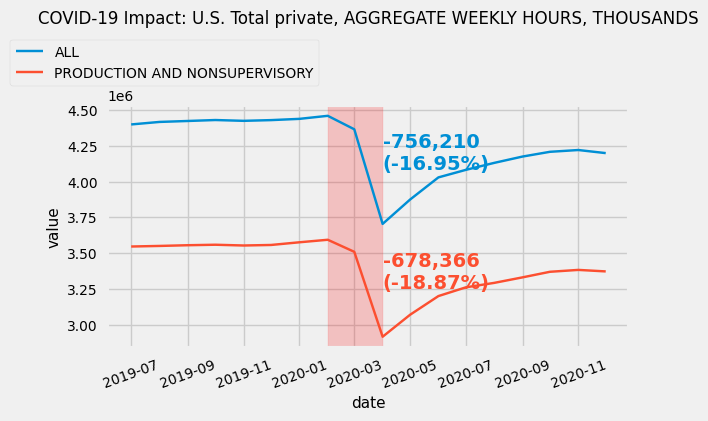

In [13]:
data = dfall

ind = indlvl(1).values[0]
typ = types[4]
c19a = datetime.date(2020,2,1)
c19b = datetime.date(2020,4,1)

cdate1 = data.date >= datetime.date(2019,7,1)
cdate2 = data.date <= datetime.date(2020,12,1)
ctype = data.data_type == typ
cind = data.industry == ind

dfog = data[cdate1&cdate2&ctype&cind]
df = dfog.groupby(['data_type', 'employee_type', 'date']).value.sum().reset_index()

# difference between start and worst of drop
df0 = df[df.employee_type == df.employee_type.unique()[0]]
start0 = df0[df0.date == c19a].value.mean()
end0 = df0[df0.date == c19b].value.mean()
diff0 = end0 - start0

df1 = df[df.employee_type == df.employee_type.unique()[1]]
start1 = df1[df1.date == c19a].value.mean()
end1 = df1[df1.date == c19b].value.mean()
diff1 = end1 - start1

plt.figure(figsize=(6,3))
sns.lineplot(data=df, x='date', y='value', hue='employee_type',)
plt.title('COVID-19 Impact: U.S. ' + ind + ', ' + typ, y=1.3)
plt.legend(loc='lower left', bbox_to_anchor=(-0.2,1.05))

plt.axvspan(datetime.date(2020,2,1), datetime.date(2020,4,1), 
            color='red', alpha=0.2)

plt.text(datetime.date(2020,4,1), start0+diff0/2, 
         str('{:,}'.format(round(diff0)))+'\n({:.2%})'.format(diff0/start0),
         color = sns.color_palette()[0],
         weight='bold')
plt.text(datetime.date(2020,4,1), start1+diff1/2, 
         str('{:,}'.format(round(diff1)))+'\n({:.2%})'.format(diff1/start1),
         color = sns.color_palette()[1],
         weight='bold')

plt.xticks(rotation=20); 

Average weekly hours = total weekly hours / total employees

AWH: total hours vs total employees

### COVID Impact, by industry

In [ ]:
indlvl(3)

In [ ]:
df2 = data[ctype
           & data.industry.isin(indlvl(4).values)
           & data.date.isin([c19a, c19b])]
df2 = df2.groupby(['industry', 'data_type', 'employee', 'date']).value.sum().reset_index()
df2 = df2.pivot(index=['industry', 'data_type', 'employee'], columns='date', values='value').reset_index()
df2.columns.name = None
df2['diff'] = df2[df2.columns[4]] - df2[df2.columns[3]]
df2['% change'] = (df2[df2.columns[4]] - df2[df2.columns[3]])/df2[df2.columns[3]]
df2

In [ ]:
order = df2[df2.employee == 'ALL EMPLOYEES'].groupby('industry')['% change'].min().sort_values().head(15)
plt.figure(figsize=(4,6))
sns.barplot(data=df2, y='industry', x='% change', hue='employee', order=order.index)
plt.legend(loc='upper left', bbox_to_anchor=(-0.5,-0.1))

order = df2[df2.employee == 'ALL EMPLOYEES'].groupby('industry')['% change'].min().sort_values().tail(15)
plt.figure(figsize=(4,6))
sns.barplot(data=df2, y='industry', x='% change', hue='employee', order=order.index)
plt.legend(loc='upper left', bbox_to_anchor=(-0.5,-0.1))

In [ ]:
order = df2.groupby('industry')[df2.columns[3]].max().sort_values(ascending=False).head(20)
plt.figure(figsize=(4,6))
sns.barplot(data=df2, y='industry', x=df2.columns[3], hue='employee', order=order.index)
plt.legend(loc='upper left', bbox_to_anchor=(-0.5,-0.1))

In [ ]:
# sns.set_palette('Dark2')
sns.color_palette('tab10_r')
# sns.color_palette()

# How is the U.S. Labor Market Recovering from COVID-19?

### COVID Recovery, Total Private Sector

### COVID Recovery, by Industry

# WIP

In [ ]:
url = 'https://download.bls.gov/pub/time.series/le/le.series'
df = pd.read_csv(url, sep='\t')

url = 'https://download.bls.gov/pub/time.series/le/le.data.0.Current'
df1 = pd.read_csv(url, sep='\t')

In [ ]:
# earn_code 01
# fips_code 00
# indy_code 0000

In [ ]:
cond1 = df.earn_code == 1
cond2 = df.fips_code == 0
cond3 = df.indy_code == 0

df[cond1 & cond2 & cond3].iloc[:,0:4]

In [ ]:
a = df1.columns[0]
v = df1.columns[3]

display(a, v)

In [ ]:
data = df1[df1[a] == df1[a][0]]
data[v] = data[v].str.lstrip(' ').astype(float)

plt.figure(figsize=(8,4))
sns.lineplot(data = data[data.year > 2016], x=data[data.year > 2016].index, y=v);

In [ ]:
data[data.year >= 2019]